# Prospecção de Dados 2022/2023
## First Home Assignment
### David Conceição 52518, Tomás Matos 53438, Rudolfo Faria 44252

## Notes:

##### Divide the train.csv data into train and test set. Do svd in the training set. train the model with the svd matrix result and evaluate the model with the test set
##### With pca we transform both the training and the testing set to use only the principal component(we do not need to know wich are the component)


#### Imports 


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, matthews_corrcoef, mean_squared_error
from sklearn.model_selection import cross_val_score


#### Visualize the UCI Supercoductivity Dataset

In [32]:
# read the train and unique csv files 
train_data = pd.read_csv('train.csv')
unique_data = pd.read_csv('unique_m.csv')

# merge the files together
merged_dataset = pd.concat([train_data,unique_data],axis=1)

# remove critical_temp and material columns
dataset = merged_dataset.drop(['critical_temp','material'],axis=1)
print(train_data.shape,unique_data.shape,dataset.shape)
pd.DataFrame(dataset)


(21263, 82) (21263, 88) (21263, 167)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [33]:
X = np.array(dataset.values)
y = np.array(train_data.values[:,-1])
(X.shape,y.shape)
print(y)

[29.   26.   19.   ...  1.98  1.84 12.8 ]


##### Dividing the dataset into training and testing set. Scaling the X_train and X_test
##### We want to aply SVD to the training set so we have to transform the matrix with the independent variables and the depend one also???

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print('X_train shape: ' + str(X_train.shape))
print('y_train shape: ' + str((y_train.shape)))
print('X_test shape: ' + str((X_test.shape)))
print('y_test shape: ' + str((y_test.shape)))

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# merge the X_train and y_train so that we can put in the svd
train_set = np.append(np.array(X_train), np.array(y_train).reshape(-1,1), axis=1)
print('train_set shape: ' + str((train_set.shape)))


X_train shape: (14246, 167)
y_train shape: (14246,)
X_test shape: (7017, 167)
y_test shape: (7017,)
train_set shape: (14246, 168)


## Objective 1 - Dimensionality reduction
### Perform dimensionality reduction (preferably PCA or SVD) and analize the data

### SVD
##### Problem: i dont understand why im getting a same size matrix with the SVD when it should perform Dimensionality Reduction
##### Define a set of functions to transform a given array into a new one using SVD

In [35]:
# Function that returns the U,S and V matrices. 
# Also gives the combined importance of the components
def toSVD(data):
    u,s,v = np.linalg.svd(data)
    for i in range(len(s)):
        print("first %d components have a combined importance of %7.4f" %(i+1, s[:i+1].sum()/s.sum()))
    return [u,s,v]

# Function that calculates the new matrix (U*S*V) with a given number of components
def components(u,s,v, n_components):
    U = u[:,:n_components]
    S = np.diag(s[:n_components]) #presented in matrix diagonal format
    V = v[:n_components, :]
    return U @ S @ V

# Function that calculates the MSE and rmse given the original and SVD matrices
def evaluateSVD(old_matrix, new_matrix):
    MSE=((old_matrix - new_matrix)**2).mean()
    rmse=(np.sqrt((old_matrix - new_matrix)**2)).mean()
    return [MSE,rmse]

In [36]:
# Transform the train_array
new = toSVD(train_set)

first 1 components have a combined importance of  0.5411
first 2 components have a combined importance of  0.7634
first 3 components have a combined importance of  0.8328
first 4 components have a combined importance of  0.8707
first 5 components have a combined importance of  0.9022
first 6 components have a combined importance of  0.9253
first 7 components have a combined importance of  0.9432
first 8 components have a combined importance of  0.9551
first 9 components have a combined importance of  0.9634
first 10 components have a combined importance of  0.9683
first 11 components have a combined importance of  0.9726
first 12 components have a combined importance of  0.9764
first 13 components have a combined importance of  0.9785
first 14 components have a combined importance of  0.9804
first 15 components have a combined importance of  0.9823
first 16 components have a combined importance of  0.9839
first 17 components have a combined importance of  0.9853
first 18 components hav

In [37]:
d = components(new[0], new[1], new[2],5)
d.shape

(14246, 168)

##### Bellow we can see that by increasing the number of components the MSE and rmse will decrease. The goal of SVD is to reduce the dimensionality of a dataset while preserving as much information as possible therefore, we will have to find the best combination between number of components and model performance.


With 1 components:
The MSE is: 266979.8057
The rsme is: 103.3352
 
With 5 components:
The MSE is: 5286.1250
The rsme is:  18.3016
 
With 10 components:
The MSE is: 265.4524
The rsme is:   5.7877
 
With 20 components:
The MSE is: 20.3811
The rsme is:   1.7010
 
With 30 components:
The MSE is:  3.4222
The rsme is:   0.7232
 
With 50 components:
The MSE is:  0.4066
The rsme is:   0.2101
 
With 70 components:
The MSE is:  0.0863
The rsme is:   0.0960
 


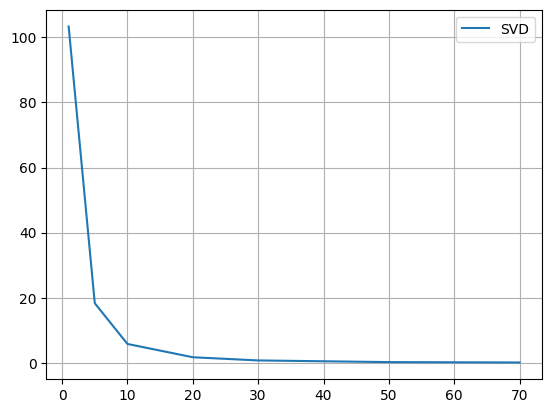

In [38]:
n_components = [1,5,10,20,30,50,70]
RMSEs=[]
for n in n_components:
    print("With %d components:"%(n))
    MSE = evaluateSVD(train_set,components(new[0], new[1], new[2],n))[0]
    rmse = evaluateSVD(train_set,components(new[0], new[1], new[2],n))[1]
    RMSEs.append(rmse)
    print("The MSE is: %7.4f\nThe rsme is: %8.4f" % (MSE, rmse))
    print(" ")

plt.plot(n_components, RMSEs, label="SVD")
plt.legend()
plt.grid()
plt.show()
    

### PCA


In [39]:
from sklearn.decomposition import PCA

W_train, v_train = np.linalg.eig(X_train_scaled.T @ X_train_scaled)
vexp_train = W_train/W_train.sum()
n_comps=80
pca_train= PCA(n_components=n_comps)
pca_train.fit(X_train_scaled)
tve=0
for i, ve in enumerate(pca_train.explained_variance_ratio_):
    tve+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve) )
print()

#! Doing PCA for the X_test. Not sure if it is done this way 
W_test, v_test = np.linalg.eig(X_test_scaled.T @ X_test_scaled)
vexp_test = W_test/W_test.sum()
pca_test = PCA(n_components=n_comps)
pca_test.fit(X_test_scaled)
tve2=0
for i, ve in enumerate(pca_test.explained_variance_ratio_):
    tve2+=ve
    print("PC%d - Variance explained: %7.4f - Total Variance: %7.4f" % (i, ve, tve2) )
print()

PC0 - Variance explained:  0.2086 - Total Variance:  0.2086
PC1 - Variance explained:  0.0581 - Total Variance:  0.2667
PC2 - Variance explained:  0.0536 - Total Variance:  0.3203
PC3 - Variance explained:  0.0432 - Total Variance:  0.3635
PC4 - Variance explained:  0.0335 - Total Variance:  0.3970
PC5 - Variance explained:  0.0225 - Total Variance:  0.4194
PC6 - Variance explained:  0.0213 - Total Variance:  0.4407
PC7 - Variance explained:  0.0183 - Total Variance:  0.4590
PC8 - Variance explained:  0.0160 - Total Variance:  0.4750
PC9 - Variance explained:  0.0150 - Total Variance:  0.4900
PC10 - Variance explained:  0.0137 - Total Variance:  0.5036
PC11 - Variance explained:  0.0128 - Total Variance:  0.5164
PC12 - Variance explained:  0.0121 - Total Variance:  0.5286
PC13 - Variance explained:  0.0116 - Total Variance:  0.5402
PC14 - Variance explained:  0.0113 - Total Variance:  0.5514
PC15 - Variance explained:  0.0109 - Total Variance:  0.5623
PC16 - Variance explained:  0.0107

In [40]:
X_train_PCA = X_train_scaled @ v_train[:n_comps,:].T
X_test_PCA = X_test_scaled @ v_test[:n_comps,:].T
(X_train_PCA.shape,X_test_PCA.shape)

((14246, 80), (7017, 80))

## Objective 2 - Create a Regression and classification model

### 2.1. Make a regression model. We are using Linear Regression and Decision Tree


##### 2.1.1 Using the full dataset to train the models

In [41]:
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()

lr_model.fit(X_train_scaled,y_train)
dt_model.fit(X_train_scaled,y_train)

lr_preds = lr_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test_scaled)

lr_rmse = mean_squared_error(y_test, lr_preds)
dt_rmse = mean_squared_error(y_test, dt_preds)

print("The rmse for the Liner Regression Model is %d"%(np.sqrt(lr_rmse)))
print("The rmse for the Decion Tree Model is %d"%(np.sqrt(dt_rmse)))
lr_scores = cross_val_score(lr_model, X, y, cv=5)
print(lr_scores)
dt_scores = cross_val_score(dt_model, X, y, cv=5)
print(dt_scores)

The rmse for the Liner Regression Model is 23
The rmse for the Decion Tree Model is 12
[ 0.48322108 -0.59234547  0.61345726 -4.77617039  0.29963382]
[0.50159486 0.5330143  0.81785728 0.66894789 0.37498427]


##### 2.1.2 Using the projection of the full dataset to train the models

In [42]:
lr_model2 = LinearRegression()
dt_model2 = DecisionTreeRegressor()

lr_model2.fit(X_train_PCA,y_train)
dt_model2.fit(X_train_PCA,y_train)

lr2_preds = lr_model2.predict(X_test_PCA)
dt2_preds = dt_model2.predict(X_test_PCA)

lr2_rmse = mean_squared_error(y_test, lr2_preds)
dt2_rmse = mean_squared_error(y_test, dt2_preds)

print("The rmse for the Liner Regression Model is %d"%(np.sqrt(lr2_rmse)))
print("The rmse for the Decion Tree Model is %d"%(np.sqrt(dt2_rmse)))
lr2_scores = cross_val_score(lr_model2, X, y, cv=5)
print(lr2_scores)
dt2_scores = cross_val_score(dt_model2, X, y, cv=5)
print(dt2_scores)

#! Problems:  
#! Why are the models trained with the full dataset getting better results than the ones trained with the projection? 
#! Is the PCA done correctly?
#! Why are the rsme so high

The rmse for the Liner Regression Model is 148
The rmse for the Decion Tree Model is 50
[ 0.48322108 -0.59234547  0.61345726 -4.77617039  0.29963382]
[0.50295648 0.54937884 0.81757894 0.65682352 0.38198869]


### 2.2. Make a classification model